In [3]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots 

Text(0.5, 1.0, 'Seeking TV-sales regression')

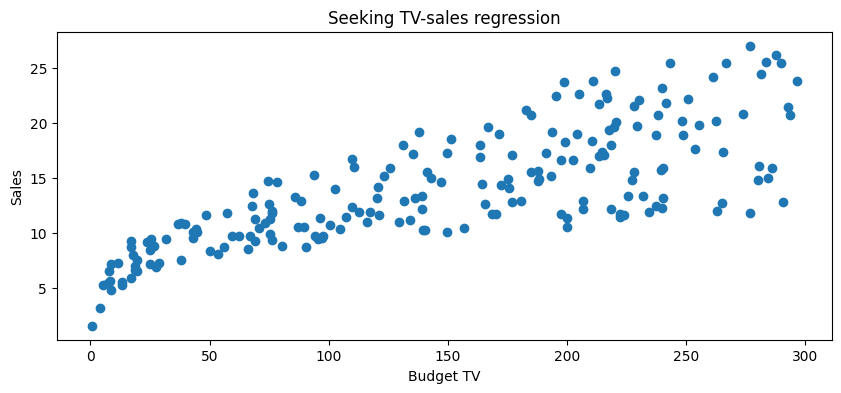

In [29]:
sales = pd.read_csv("../data/Advertising.csv")
fig, axes = subplots(figsize=(10, 4))

x = np.array( sales['TV'] )
y = np.array( sales['sales'] )

axes.scatter(x, y, marker='o')
axes.set_xlabel('Budget TV')
axes.set_ylabel('Sales')
axes.set_title('Seeking TV-sales regression')

In [30]:
def estimate_parameters( x : np.array, y : np.array ) -> tuple[float, float]:
    x_sample_mean = x.mean()
    y_sample_mean = y.mean()

    divisor = 0
    dividend = 0
    for i in range(len(x)):
        divisor += ( x[i] - x_sample_mean ) ** 2
        dividend += ( y[i] - y_sample_mean ) * ( x[i]  - x_sample_mean )
    
    if divisor == 0:
        raise ValueError("Divisor cannot be zero")

    beta_1 = dividend / divisor
    beta_0 = y_sample_mean - beta_1 * x_sample_mean
    return beta_0, beta_1

Beta_0: 7.03 and Beta_1: 0.05


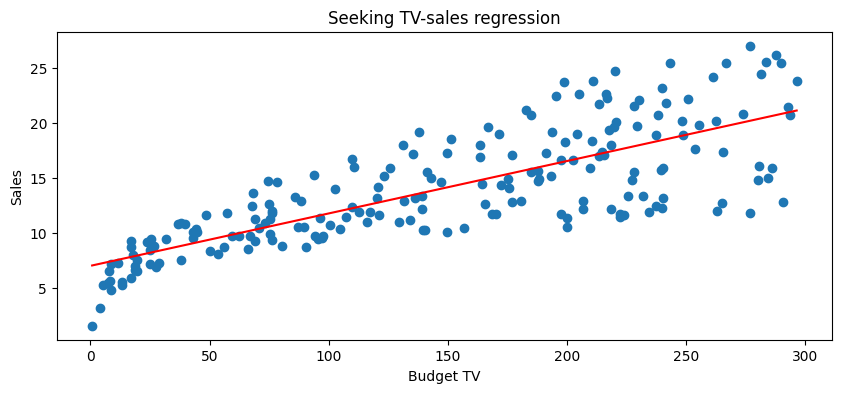

In [31]:
beta_0, beta_1 = estimate_parameters( x, y )

x_line = np.linspace( x.min(), x.max(), 50 )
y_line = beta_1 * x_line + beta_0


print(f'Beta_0: {beta_0:.2f} and Beta_1: {beta_1:.2f}')

axes.plot( x_line, y_line, color='red' )

fig